In [1]:
# Lots of imports
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
% matplotlib inline
from datetime import datetime
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Matthew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("tweets.csv")
df.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,2.532612e+09,kathiemrr,1.488207e+12,2017-02-27 14:54:00,NaN,NaN,NaN,#ThingsDoneByMistake kissing auntie in the lips,8.362279e+17,NaN,"[""ThingsDoneByMistake""]",[],POSTED,[],NaN,NaN
1,2.531160e+09,traceyhappymom,1.471273e+12,2016-08-15 14:50:20,NaN,NaN,NaN,RT @mc_derpin: #TheOlderWeGet the more pessimi...,7.651989e+17,NaN,"[""TheOlderWeGet""]",[],POSTED,[],NaN,NaN
2,NaN,evewebster373,1.435701e+12,2015-06-30 21:56:09,NaN,NaN,NaN,RT @dmataconis: Ready To Feel Like A Failure? ...,6.160023e+17,NaN,[],[],POSTED,[],NaN,NaN
3,4.840552e+09,blacktolive,1.474013e+12,2016-09-16 08:04:48,18.0,False,17.0,Amen! #blacklivesmatter https://t.co/wGffaOqgzl,7.766933e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""Blacklivesmatter""]",[],POSTED,[],NaN,NaN
4,1.694026e+09,jacquelinisbest,1.474228e+12,2016-09-18 19:46:25,0.0,False,0.0,RT @NahBabyNah: Twitchy: Chuck Todd caught out...,7.775946e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""WakeUpAmerica""]","[""http://ln.is/twitchy.com/loriz-31/3yafU""]",POSTED,"[""nahbabynah""]",7.775915e+17,NaN


In [3]:
# Show how to get sentiment using TextBlob
from textblob import TextBlob
for i,row in df.head().iterrows():
    print("Text:",row['text'],"\nSentiment:",TextBlob(row['text']).sentiment.polarity)

Text: #ThingsDoneByMistake kissing auntie in the lips 
Sentiment: 0.0
Text: RT @mc_derpin: #TheOlderWeGet the more pessimistic we are https://t.co/zS3jHZJl8P 
Sentiment: 0.5
Text: RT @dmataconis: Ready To Feel Like A Failure? Joan Of Arc Was Only 19 When She Was Burned At The Stake http://t.co/S2j1IFm4y9 
Sentiment: -0.038888888888888896
Text: Amen! #blacklivesmatter https://t.co/wGffaOqgzl 
Sentiment: 0.0
Text: RT @NahBabyNah: Twitchy: Chuck Todd caught out there shilling for Hillary Clinton
The post BUSTED: Adam Baldwi... https://t.co/ay28pMpDw6 #… 
Sentiment: 0.0


In [4]:
# Create an array of all sentiments for the dataframe
sentiment = [TextBlob(str(row['text'])).sentiment.polarity for i,row in df.iterrows()]

In [5]:
# Add the sentiment column to the dataframe with the sentiment array as the values
df['sentiment'] = sentiment

In [6]:
# Scroll all the way to the right to see the sentiment column added
df.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,sentiment
0,2.532612e+09,kathiemrr,1.488207e+12,2017-02-27 14:54:00,NaN,NaN,NaN,#ThingsDoneByMistake kissing auntie in the lips,8.362279e+17,NaN,"[""ThingsDoneByMistake""]",[],POSTED,[],NaN,NaN,0.000000
1,2.531160e+09,traceyhappymom,1.471273e+12,2016-08-15 14:50:20,NaN,NaN,NaN,RT @mc_derpin: #TheOlderWeGet the more pessimi...,7.651989e+17,NaN,"[""TheOlderWeGet""]",[],POSTED,[],NaN,NaN,0.500000
2,NaN,evewebster373,1.435701e+12,2015-06-30 21:56:09,NaN,NaN,NaN,RT @dmataconis: Ready To Feel Like A Failure? ...,6.160023e+17,NaN,[],[],POSTED,[],NaN,NaN,-0.038889
3,4.840552e+09,blacktolive,1.474013e+12,2016-09-16 08:04:48,18.0,False,17.0,Amen! #blacklivesmatter https://t.co/wGffaOqgzl,7.766933e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""Blacklivesmatter""]",[],POSTED,[],NaN,NaN,0.000000
4,1.694026e+09,jacquelinisbest,1.474228e+12,2016-09-18 19:46:25,0.0,False,0.0,RT @NahBabyNah: Twitchy: Chuck Todd caught out...,7.775946e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""WakeUpAmerica""]","[""http://ln.is/twitchy.com/loriz-31/3yafU""]",POSTED,"[""nahbabynah""]",7.775915e+17,NaN,0.000000


In [7]:
# Display 20 highest sentiment texts
highest_sent = df.sort_values(['sentiment'], ascending=False)
for i in range(20):
    print('Text:',highest_sent.iloc[i,7],'\nSentiment:',highest_sent.iloc[i,16])

Text: RT @indigenous01: Y'all know when @rushlimbaugh is away, the @MarkSteynOnline will play! From Ice Station EIB... lol! 
Sentiment: 1.0
Text: #MyEmmyNominationWouldBe best proposal ever 
Sentiment: 1.0
Text: RT @Patriot_MM: #Trump 'in excellent health' - his doctor - https://t.co/JP2BEAQ2QX

#hilLIARy is on #NapTime 
Sentiment: 1.0
Text: Perhaps it is our imperfections that make us so perfect for one another 
Sentiment: 1.0
Text: RT @DivineMoments: Emmys Recap: Donald Trump the Night's Biggest Star https://t.co/Tbaemk44E1 Will Win!  The Unhinged LeftWing Creeps are s… 
Sentiment: 1.0
Text: France: It WAS a beautiful landmark Church! 
Now Saudi-funded mosque being built! https://t.co/eMkbgT2X7p 
Sentiment: 1.0
Text: RT @Lrihendry: COME ON TRUMPER'S 

Let's make @SheriffClarke 's Cop Under Fire a #1 BEST seller! 

ORDER your copy here 🔽🔽🔽

https://t.co/J… 
Sentiment: 1.0
Text: RT @BeckyWuThere: OKAY WATCH THIS.  @JoeNBC ADMITS Hillary started the #birtherism issue.  WATCH AND SHARE!!

In [8]:
# Display 20 lowest sentiment texts
lowest_sent = df.sort_values(['sentiment'])
for i in range(20):
    print('Text:',lowest_sent.iloc[i,7],'\nSentiment:',lowest_sent.iloc[i,16])

Text: RT @birdieglad: Donald Trump is Poaching the Worst and Dimmest for His Administration From Fox News via @politicususa https://t.co/Dev3lZeC… 
Sentiment: -1.0
Text: Will anyone tell us what`s going on?!! That what happens embodies my worst predictions! #phosphorusdisaster 
Sentiment: -1.0
Text: RT @RicoBM: @CBSNews Don't want to show the inaugural prayer service?  Pathetic 
Sentiment: -1.0
Text: RT @_HankRearden: Apologize for the Bolshevik genocide of 20M Christians. Stop cashing in on the holocaust, it's disgusting. https://t.co/U… 
Sentiment: -1.0
Text: RT @GuardianUS: Janet Jackson's Nasty gets boost after Trump's 'nasty woman' comment https://t.co/F27r4sRUIB 
Sentiment: -1.0
Text: #StopIslam Are you insane, Obama? We don't need Syria's refugees showing up here in the US! #IslamKills 
Sentiment: -1.0
Text: RT @Desert2theSea: So f**king transparent. Hiltards peddling all this stuff simultaneously. DESPERATE!!!  #NextFakeTrumpVictim #MAGA https:… 
Sentiment: -1.0
Text: RT @Liber

In [9]:
for i in range(20):
    print("Text:",df.iloc[i,7],"Sentiment:",TextBlob(df.iloc[i,7]).sentiment.polarity,"Hashtag Sentiment:",TextBlob(str(df.iloc[i,10])).sentiment.polarity)

Text: #ThingsDoneByMistake kissing auntie in the lips Sentiment: 0.0 Hashtag Sentiment: 0.0
Text: RT @mc_derpin: #TheOlderWeGet the more pessimistic we are https://t.co/zS3jHZJl8P Sentiment: 0.5 Hashtag Sentiment: 0.0
Text: RT @dmataconis: Ready To Feel Like A Failure? Joan Of Arc Was Only 19 When She Was Burned At The Stake http://t.co/S2j1IFm4y9 Sentiment: -0.038888888888888896 Hashtag Sentiment: 0.0
Text: Amen! #blacklivesmatter https://t.co/wGffaOqgzl Sentiment: 0.0 Hashtag Sentiment: 0.0
Text: RT @NahBabyNah: Twitchy: Chuck Todd caught out there shilling for Hillary Clinton
The post BUSTED: Adam Baldwi... https://t.co/ay28pMpDw6 #… Sentiment: 0.0 Hashtag Sentiment: 0.0
Text: RT @mcicero10: #BernieSanders #Trump people should rally TOGETHER against the establishment who is 💩-ing on both choices #thefix Sentiment: 0.0 Hashtag Sentiment: 0.0
Text: RT @ItsJustJaynie: @HillaryClinton The undecided voters on that stage was polled and said trump won. @cnn is biased. Sentiment: 0.0 Hashta

In [10]:
# Break hashtags into multiple words
regex = re.compile(r'([A-Z][a-z]*)')
separated_hashtags = [' '.join(re.split(regex, re.sub(r'[\W]','',df.iloc[i,10]))).strip(" ") for i in range(df.shape[0])]
df['separated_hashtags'] = separated_hashtags

In [11]:
for i in range(5):
    print(separated_hashtags[i])

Things  Done  By  Mistake
The  Older  We  Get

Blacklivesmatter
Wake  Up  America


In [12]:
hashtag_polarity = []
for i,row in df.iterrows():
    hashtag_polarity.append(TextBlob(row['separated_hashtags']).sentiment.polarity)
df['hashtag_polarity'] = hashtag_polarity

In [13]:
for i,row in df.head().iterrows():
    if TextBlob(df.iloc[i,7]).sentiment.polarity is not 0.0:
        print("Text:",df.iloc[i,7],"Text Sentiment",TextBlob(df.iloc[i,7]).sentiment.polarity,"Hashtag",df.iloc[i,10],"Hashtag Sentiment:",TextBlob(separated_hashtags[i]).sentiment.polarity)

Text: #ThingsDoneByMistake kissing auntie in the lips Text Sentiment 0.0 Hashtag ["ThingsDoneByMistake"] Hashtag Sentiment: 0.0
Text: RT @mc_derpin: #TheOlderWeGet the more pessimistic we are https://t.co/zS3jHZJl8P Text Sentiment 0.5 Hashtag ["TheOlderWeGet"] Hashtag Sentiment: 0.16666666666666666
Text: RT @dmataconis: Ready To Feel Like A Failure? Joan Of Arc Was Only 19 When She Was Burned At The Stake http://t.co/S2j1IFm4y9 Text Sentiment -0.038888888888888896 Hashtag [] Hashtag Sentiment: 0.0
Text: Amen! #blacklivesmatter https://t.co/wGffaOqgzl Text Sentiment 0.0 Hashtag ["Blacklivesmatter"] Hashtag Sentiment: 0.0
Text: RT @NahBabyNah: Twitchy: Chuck Todd caught out there shilling for Hillary Clinton
The post BUSTED: Adam Baldwi... https://t.co/ay28pMpDw6 #… Text Sentiment 0.0 Hashtag ["WakeUpAmerica"] Hashtag Sentiment: 0.0


In [14]:
stop_words.add('rt')
stop_words.add('@')

In [15]:
stop_words

{'@',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own

In [16]:
text = df['text']
cleaned_text = []
wordnet_lemmatizer = WordNetLemmatizer()
link_regex = re.compile(r'((?:http(?:s)?):\/\/(?:w{3}|t)\.(?:\w+\.)?(?:co(?:m)?)?(?:\/)(?:\w+)?)')
punctuation = re.compile(r'\W+')
hashtags = re.compile(r'#\w+')
usernames = re.compile(r'@\w+')
for row in text:
    row = link_regex.sub('',str(row).lower())
    row = hashtags.sub('', row)
    row = usernames.sub('', row)
    tokens = word_tokenize(row.lower())
    words_to_add = []
    for word in tokens:
        word = punctuation.sub('',word)
        if word not in stop_words and word is not '':
            words_to_add.append(wordnet_lemmatizer.lemmatize(word))
    cleaned_text.append(' '.join(words_to_add))
df['cleaned_text'] = cleaned_text

In [17]:
for i,row in df.head().iterrows():
    print("Text:",cleaned_text[i],"Text Sentiment",TextBlob(cleaned_text[i]).sentiment.polarity,"Hashtag",df.iloc[i,10],"Hashtag Sentiment:",TextBlob(separated_hashtags[i]).sentiment.polarity)

Text: kissing auntie lip Text Sentiment 0.0 Hashtag ["ThingsDoneByMistake"] Hashtag Sentiment: 0.0
Text: pessimistic Text Sentiment 0.0 Hashtag ["TheOlderWeGet"] Hashtag Sentiment: 0.16666666666666666
Text: ready feel like failure joan arc 19 burned stake Text Sentiment -0.05833333333333335 Hashtag [] Hashtag Sentiment: 0.0
Text: amen Text Sentiment 0.0 Hashtag ["Blacklivesmatter"] Hashtag Sentiment: 0.0
Text: twitchy chuck todd caught shilling hillary clinton post busted adam baldwi Text Sentiment 0.0 Hashtag ["WakeUpAmerica"] Hashtag Sentiment: 0.0


In [18]:
cleaned_text[0]

'kissing auntie lip'

In [19]:
df.iloc[0,3]

'2017-02-27 14:54:00'

In [20]:
datetime.strptime(df.iloc[0,3], '%Y-%m-%d %H:%M:%S')

datetime.datetime(2017, 2, 27, 14, 54)

In [21]:
date_list = []
for i,rows in df.iterrows():
    try:
        date_list.append(datetime.strptime(df.iloc[i,3], '%Y-%m-%d %H:%M:%S'))
    except:
        date_list.append(None)

In [22]:
df['datetime'] = date_list

In [23]:
df.set_index('datetime', inplace=True)

In [24]:
df = df.sort_index()

In [25]:
df.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,sentiment,separated_hashtags,hashtag_polarity,cleaned_text
datetime,,,,,,,,,,,,,,,,,,,,
2014-07-14 18:04:55,2.533654e+09,evagreen69,1.405361e+12,2014-07-14 18:04:55,NaN,NaN,NaN,I am in Love with LOVE!,4.887460e+17,NaN,[],[],POSTED,[],NaN,NaN,0.562500,,0.0,love love
2014-07-17 20:27:52,2.497991e+09,austinlovesbeer,1.405629e+12,2014-07-17 20:27:52,NaN,NaN,NaN,Why give second chances when there are people ...,4.898691e+17,NaN,[],[],POSTED,[],NaN,NaN,0.125000,,0.0,give second chance people waiting first
2014-07-20 06:30:01,2.540882e+09,heyits_toby,1.405838e+12,2014-07-20 06:30:01,NaN,NaN,NaN,"True tolerance does not consist in saying, ""Yo...",4.907454e+17,NaN,[],[],POSTED,[],NaN,NaN,0.114683,,0.0,true tolerance consist saying may right let u ...
2014-07-20 07:02:33,2.540882e+09,heyits_toby,1.405840e+12,2014-07-20 07:02:33,NaN,NaN,NaN,oh and Ur in a position to judge me because? t...,4.907536e+17,NaN,[],[],POSTED,[],NaN,NaN,0.000000,,0.0,oh ur position judge two faced bitch
2014-07-22 08:46:37,2.497991e+09,austinlovesbeer,1.406019e+12,2014-07-22 08:46:37,NaN,NaN,NaN,I'm here and you're there. There doesn't know ...,4.915046e+17,NaN,[],[],POSTED,[],NaN,NaN,0.700000,,0.0,nt know good


In [26]:
group_df = df.groupby([df.index.day.rename('day'),df.index.month.rename('month'),df.index.year.rename('year')], sort=True)['sentiment'].mean()

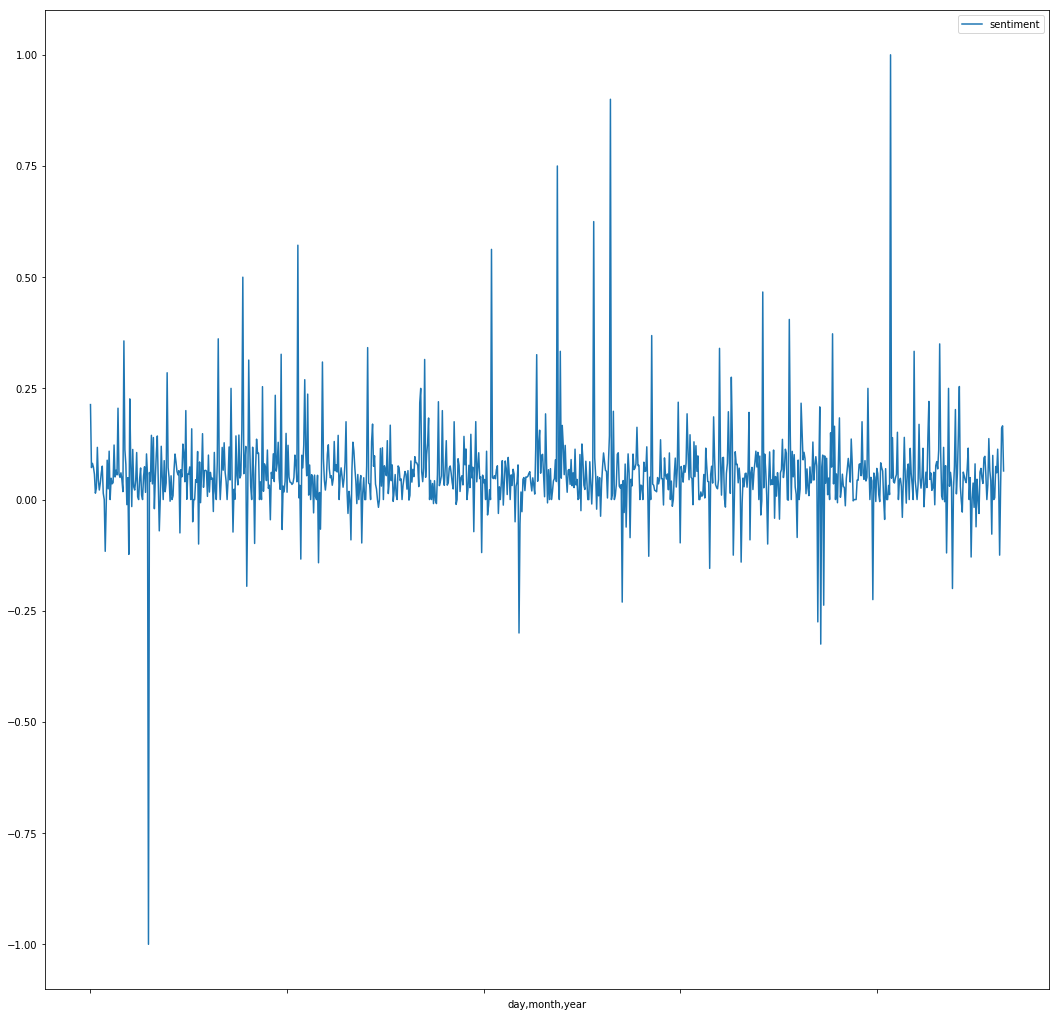

In [27]:
group_df.plot(figsize=(18,18),legend=True)